In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

df = pd.read_csv('/Users/kalel/Documents/Python Projects/Data Science/Superhero Data Cleaning & Analysis/data.csv')

df.head(5)

,id,name,powerstats__intelligence,powerstats__strength,powerstats__speed,powerstats__durability,powerstats__power,powerstats__combat,biography__full-name,biography__alter-egos,biography__aliases__001,biography__place-of-birth,biography__first-appearance,biography__publisher,biography__alignment,appearance__gender,appearance__race,appearance__height__001,appearance__height__002,appearance__weight__001,appearance__weight__002,appearance__eye-color,appearance__hair-color,work__occupation,work__base,connections__group-affiliation,connections__relatives,biography__aliases__002,biography__aliases__003,biography__aliases__004,biography__aliases__005,biography__aliases__006,biography__aliases__007,biography__aliases__008,biography__aliases__009,biography__aliases__010,biography__aliases__011,biography__aliases__012,biography__aliases__013,biography__aliases__014,biography__aliases__015,biography__aliases__016,biography__aliases__017,biography__aliases__018,biography__aliases__019,biography__aliases__020
0,1,A-Bomb,38.0,100.0,17.0,80.0,24.0,64.0,Richard Milhouse Jones,No alter egos found.,Rick Jones,"Scarsdale, Arizona","Hulk Vol 2 #2 (April, 2008) (as A-Bomb)",Marvel Comics,good,Male,Human,6'8,203 cm,980 lb,441 kg,Yellow,No Hair,"Musician, adventurer, author; formerly talk sh...",-,"Hulk Family; Excelsior (sponsor), Avengers (ho...",Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Abe Sapien,88.0,28.0,35.0,65.0,100.0,85.0,Abraham Sapien,No alter egos found.,Langdon Everett Caul,-,Hellboy: Seed of Destruction (1993),Dark Horse Comics,good,Male,Icthyo Sapien,6'3,191 cm,145 lb,65 kg,Blue,No Hair,Paranormal Investigator,-,Bureau for Paranormal Research and Defense,"Edith Howard (wife, deceased)",Abraham Sapien,Langdon Caul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Abin Sur,50.0,90.0,53.0,64.0,99.0,65.0,NaN,No alter egos found.,Lagzia,Ungara,"Showcase #22 (October, 1959)",DC Comics,good,Male,Ungaran,6'1,185 cm,200 lb,90 kg,Blue,No Hair,"Green Lantern, former history professor",Oa,"Green Lantern Corps, Black Lantern Corps","Amon Sur (son), Arin Sur (sister), Thaal Sines...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Abomination,63.0,80.0,53.0,90.0,62.0,95.0,Emil Blonsky,No alter egos found.,Agent R-7,"Zagreb, Yugoslavia",Tales to Astonish #90,Marvel Comics,bad,Male,Human / Radiation,6'8,203 cm,980 lb,441 kg,Green,No Hair,Ex-Spy,Mobile,former member of the crew of the Andromeda Sta...,"Nadia Dornova Blonsky (wife, separated)",Ravager of Worlds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Abraxas,88.0,63.0,83.0,100.0,100.0,55.0,Abraxas,No alter egos found.,-,Within Eternity,Fantastic Four Annual #2001,Marvel Comics,bad,Male,Cosmic Entity,-,0 cm,- lb,0 kg,Blue,Black,Dimensional destroyer,-,Cosmic Beings,"Eternity (""Father"")",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Cleaned columns
df = df.drop(columns=['appearance__height__002', 'appearance__weight__001', 'appearance__eye-color', 'appearance__hair-color', 'connections__relatives'], axis=1, errors='ignore')
df = df.drop(columns=df.columns[20:], axis=1, errors='ignore')
df = df.set_index(['id'])
df = df.rename(columns=lambda x: x.replace('biography__', '').replace('powerstats__','').replace('appearance__', '').replace('work__', ''))
df = df.rename(columns={'name':'Superhero Name', 'aliases__001':'Superhero Alias', 'full-name':'Birth Name', 'place-of-birth': 'Birth Place', 'height__001':'Height (ft)', 'weight__002':'Weight (kg)'})
df = df.rename(columns={col: ' '.join(col.split('-')) for col in df.columns})
df.columns = df.columns.str.title()
df.head(5)

,Superhero Name,Intelligence,Strength,Speed,Durability,Power,Combat,Birth Name,Alter Egos,Superhero Alias,Birth Place,First Appearance,Publisher,Alignment,Gender,Race,Height (Ft),Weight (Kg),Occupation
id,,,,,,,,,,,,,,,,,,,
1,A-Bomb,38.0,100.0,17.0,80.0,24.0,64.0,Richard Milhouse Jones,No alter egos found.,Rick Jones,"Scarsdale, Arizona","Hulk Vol 2 #2 (April, 2008) (as A-Bomb)",Marvel Comics,good,Male,Human,6'8,441 kg,"Musician, adventurer, author; formerly talk sh..."
2,Abe Sapien,88.0,28.0,35.0,65.0,100.0,85.0,Abraham Sapien,No alter egos found.,Langdon Everett Caul,-,Hellboy: Seed of Destruction (1993),Dark Horse Comics,good,Male,Icthyo Sapien,6'3,65 kg,Paranormal Investigator
3,Abin Sur,50.0,90.0,53.0,64.0,99.0,65.0,NaN,No alter egos found.,Lagzia,Ungara,"Showcase #22 (October, 1959)",DC Comics,good,Male,Ungaran,6'1,90 kg,"Green Lantern, former history professor"
4,Abomination,63.0,80.0,53.0,90.0,62.0,95.0,Emil Blonsky,No alter egos found.,Agent R-7,"Zagreb, Yugoslavia",Tales to Astonish #90,Marvel Comics,bad,Male,Human / Radiation,6'8,441 kg,Ex-Spy
5,Abraxas,88.0,63.0,83.0,100.0,100.0,55.0,Abraxas,No alter egos found.,-,Within Eternity,Fantastic Four Annual #2001,Marvel Comics,bad,Male,Cosmic Entity,-,0 kg,Dimensional destroyer


In [32]:
# Filling in Nan Values
df[['Intelligence','Strength','Speed','Durability', 'Power', 'Combat']] = df[['Intelligence','Strength','Speed','Durability', 'Power', 'Combat']].fillna(df[['Intelligence','Strength','Speed','Durability', 'Power', 'Combat']].median())
df[['Birth Name', 'Race', 'Publisher']] = df[['Birth Name', 'Race', 'Publisher']].fillna('Unknown')
df[['Alter Egos', 'Superhero Alias']] = df[['Superhero Alias', 'Alter Egos']].replace({'No alter egos found.':'None', '-':'None'})
df[['Birth Place', 'First Appearance', 'Alignment', 'Gender', 'Occupation']] = df[['Birth Place', 'First Appearance', 'Alignment', 'Gender', 'Occupation']].replace('-', 'Unknown')
df['Alignment'] = df['Alignment'].str.title()
df.loc[df['Publisher']=='Unknown']

# Cleaned and standardized the height values
mask_digit = df['Height (Ft)'].astype(str).str.isdigit()
df.loc[mask_digit, 'Height (Ft)'] = df.loc[mask_digit, 'Height (Ft)'].astype(str)+'\'0'
mask_missing_inches = df['Height (Ft)'].astype(str).str.endswith('\'') & df['Height (Ft)'].str.count('\'')==1
df.loc[mask_missing_inches, 'Height (Ft)'] = df.loc[mask_missing_inches, 'Height (Ft)'].astype(str)+'0'
mask_over_inches = df['Height (Ft)'].str.count('\'')==2
df.loc[mask_over_inches, 'Height (Ft)'] = df.loc[mask_over_inches, 'Height (Ft)'].astype(str)+'x'
df.loc[mask_over_inches, 'Height (Ft)'] = df.loc[mask_over_inches, 'Height (Ft)'].str.replace('\'x','')
mask_string = (df['Height (Ft)'].astype(str).str.isalpha()) | (df['Height (Ft)'] == '-') | (df['Height (Ft)'].str.contains(','))
df.loc[mask_string, 'Height (Ft)'] = np.nan
height_split = df['Height (Ft)'].str.split('\'',expand=True)
height_split = height_split.rename(columns={0:'Ft', 1:'In'})
height_split = height_split.fillna(0)
height_split['Ft'] = height_split['Ft'].astype(int)
height_split['In'] = height_split['In'].astype(int)
height_split['Ft'] += height_split['In']//12
height_split['In'] = height_split['In'] % 12
df['Height (Ft)'] = height_split['Ft'].astype(str)+'\''+height_split['In'].astype(str)
df.loc[df['Height (Ft)'] == '0\'0', 'Height (Ft)'] = 'Unknown'

# Cleaned and standardized the weight values
mask_tons = df['Weight (Kg)'].str.contains('tons', na=False)
df.loc[mask_tons, 'Weight (Kg)'] = df.loc[mask_tons, 'Weight (Kg)'].apply( lambda x: min(float(str(x).replace('tons', '').replace(',', '').strip()) * 907.18, 1000)).astype(float)
mask_kg = df['Weight (Kg)'].str.contains('kg', case=False, na=False)
df.loc[mask_kg, 'Weight (Kg)'] = df.loc[mask_kg, 'Weight (Kg)'].str.replace('kg', '').str.strip().astype(float)
median_weight = df.loc[df['Weight (Kg)']!=0.0, 'Weight (Kg)'].median()
df.loc[df['Weight (Kg)']==0, 'Weight (Kg)'] = median_weight

df.head(5)

,Superhero Name,Intelligence,Strength,Speed,Durability,Power,Combat,Birth Name,Alter Egos,Superhero Alias,Birth Place,First Appearance,Publisher,Alignment,Gender,Race,Height (Ft),Weight (Kg),Occupation
id,,,,,,,,,,,,,,,,,,,
1,A-Bomb,38.0,100.0,17.0,80.0,24.0,64.0,Richard Milhouse Jones,Rick Jones,None,"Scarsdale, Arizona","Hulk Vol 2 #2 (April, 2008) (as A-Bomb)",Marvel Comics,Good,Male,Human,6'8,441.0,"Musician, adventurer, author; formerly talk sh..."
2,Abe Sapien,88.0,28.0,35.0,65.0,100.0,85.0,Abraham Sapien,Langdon Everett Caul,None,Unknown,Hellboy: Seed of Destruction (1993),Dark Horse Comics,Good,Male,Icthyo Sapien,6'3,65.0,Paranormal Investigator
3,Abin Sur,50.0,90.0,53.0,64.0,99.0,65.0,Unknown,Lagzia,None,Ungara,"Showcase #22 (October, 1959)",DC Comics,Good,Male,Ungaran,6'1,90.0,"Green Lantern, former history professor"
4,Abomination,63.0,80.0,53.0,90.0,62.0,95.0,Emil Blonsky,Agent R-7,None,"Zagreb, Yugoslavia",Tales to Astonish #90,Marvel Comics,Bad,Male,Human / Radiation,6'8,441.0,Ex-Spy
5,Abraxas,88.0,63.0,83.0,100.0,100.0,55.0,Abraxas,None,None,Within Eternity,Fantastic Four Annual #2001,Marvel Comics,Bad,Male,Cosmic Entity,Unknown,83.0,Dimensional destroyer


# **Q. Dataset Population, According to Publisher**

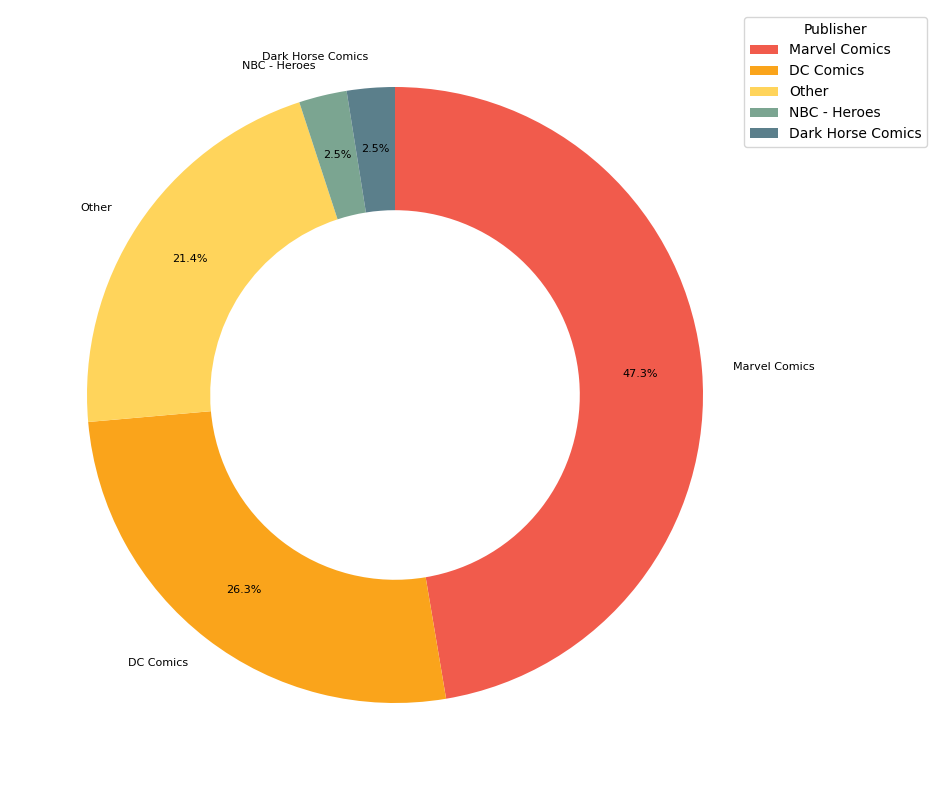

In [310]:
population_counts = df['Publisher'].value_counts(normalize=True) * 100
population_big = population_counts[population_counts > 2.1]
population_other = population_counts[population_counts <= 2].sum()
population_publisher = population_big
population_publisher['Other'] = population_other
population_publisher = population_publisher.sort_values(ascending = False)
publisher_color = ['#f15b4c', '#faa41b', '#ffd45b', '#7ba591', '#5B7F8B']
plt.figure(figsize=(10,10))
plt.pie(population_publisher, 
        labels=population_publisher.index, 
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 8},
        labeldistance=1.1,
        pctdistance=.8,
        wedgeprops={'width': 0.4}, 
        colors=publisher_color,
        counterclock=False
)
plt.legend(
    population_publisher.index,
    title='Publisher',
    loc='upper right',
    bbox_to_anchor = (1.2,1)
)
plt.show()

# **Q. Dataset Population, According to Gender**

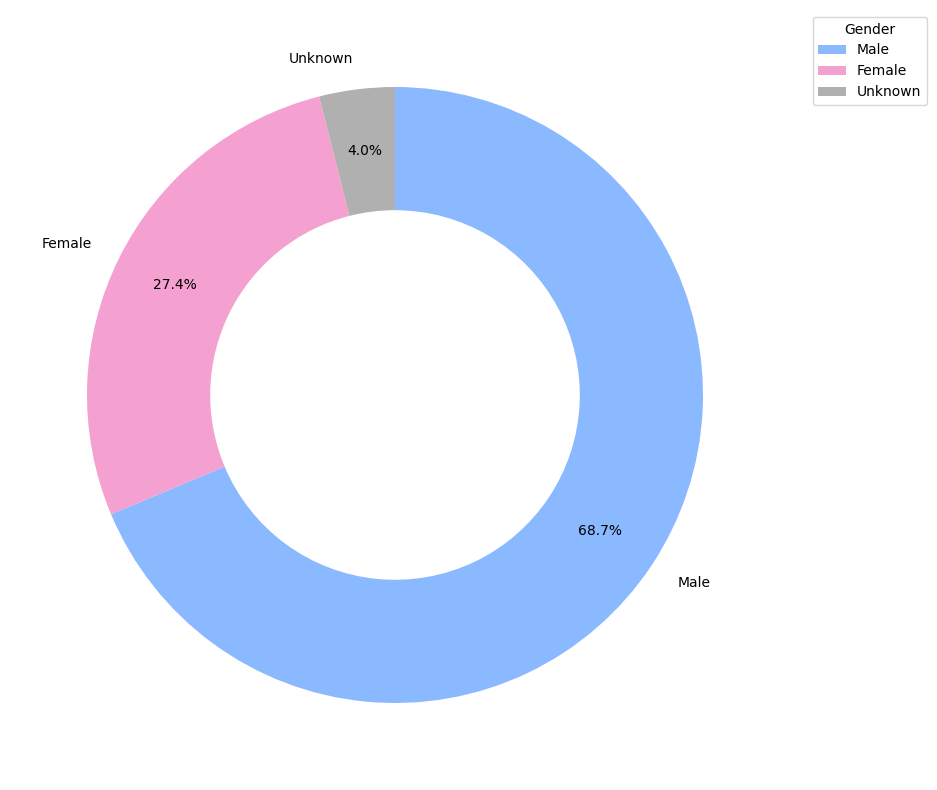

In [306]:
population_gender = df['Gender'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10,10))
plt.pie(population_gender,
        labels = population_gender.index,
        autopct = '%1.1f%%',
        startangle = 90,
        colors = ['#8AB9FF', '#F4A1D1', '#B0B0B0'],
        textprops = {'fontsize': 10},
        labeldistance = 1.1,
        pctdistance = 0.8,
        wedgeprops = {'width': 0.4},
        counterclock=False
)
plt.legend(population_gender.index,
           title = 'Gender',
           loc = 'upper right',
           bbox_to_anchor = (1.2,1)
)
plt.show()